### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

In [1]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение модуля для работы с файлами
import os
# функция из библиотеки для разделения данных.
from sklearn.model_selection import train_test_split

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

replace hw_light/0/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train_org.shape)
print('Размер массива y_train', y_train_org.shape)

Размер массива x_train (302, 20, 20, 1)
Размер массива y_train (302,)


In [4]:
accuracy_l = dict()
accuracy_r = dict()

## 10 нейронов 10 batch_size

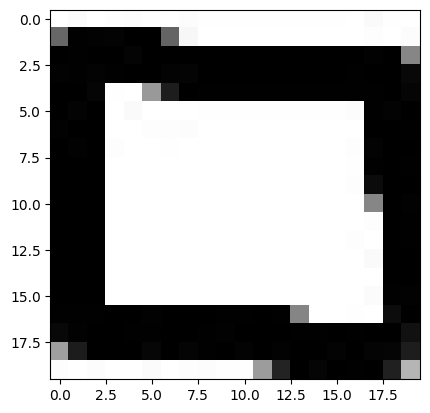

In [5]:
# Номер картинки
n =250

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [6]:
# Разделение данных на обучающий и тестовый наборы
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)


In [7]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (241, 20, 20, 1) -> (241, 400)
Форма  тестовых данных: (61, 20, 20, 1) -> (61, 400)


In [8]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [9]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 3

In [10]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [11]:
# Вывод формы y_train
print(y_train.shape)

(241, 3)


In [12]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 1. 0.]


In [13]:
# Вывод формы массива меток
print(y_train_org.shape)

(241,)


In [14]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

0


Создание нейронной сети

In [15]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(10, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(10, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [16]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                6015      
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 6248 (24.41 KB)
Trainable params: 6248 (24.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param 

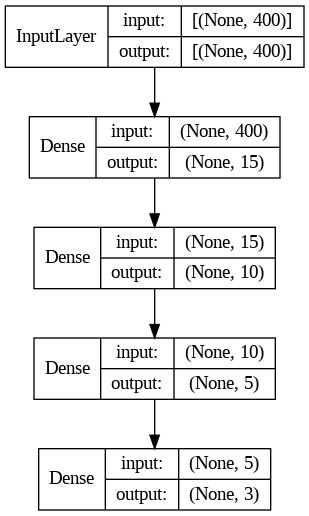

In [17]:
utils.plot_model(model_relu, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [18]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
25/25 [==============================] - 3s 31ms/step - loss: 1.0279 - accuracy: 0.4938 - val_loss: 1.0467 - val_accuracy: 0.4426
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.9100 - accuracy: 0.5809 - val_loss: 1.0721 - val_accuracy: 0.4754
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.8424 - accuracy: 0.5685 - val_loss: 0.9601 - val_accuracy: 0.5574
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.8030 - accuracy: 0.6598 - val_loss: 0.9826 - val_accuracy: 0.5246
Epoch 5/10
25/25 [==============================] - 0s 11ms/step - loss: 0.7630 - accuracy: 0.6805 - val_loss: 0.9311 - val_accuracy: 0.6557
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.7375 - accuracy: 0.6598 - val_loss: 0.9395 - val_accuracy: 0.6393
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.7176 - accuracy: 0.6888 - val_loss: 0.9962 - val_accuracy: 0.6066
Epoch 8/10
25/25 

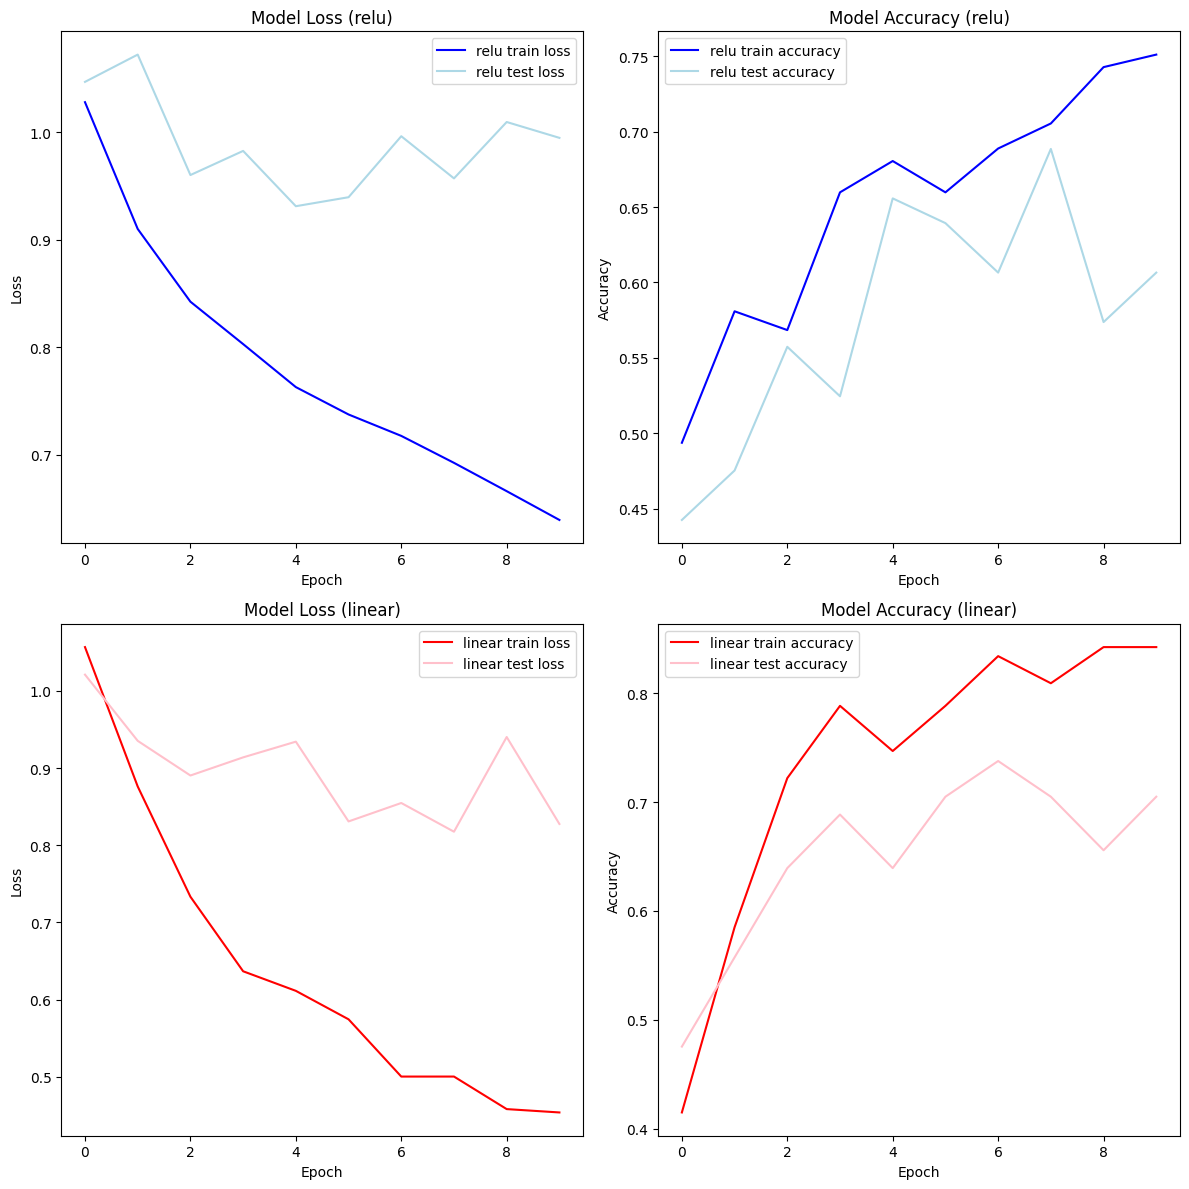

In [19]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [20]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

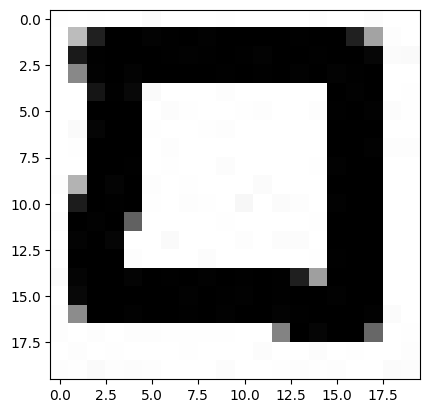

In [96]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [97]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [98]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


In [99]:
# Распознавание примера с моделью model_relu
prediction_relu = model_relu.predict(x)

# Распознавание примера с моделью model_linear
prediction_linear = model_linear.predict(x)


1/1 [==============================] - 0s 20ms/step


In [100]:
# Вывод результата
print(prediction_relu)
print(prediction_linear)

[[0.519634   0.10545937 0.37490657]]
[[0.09576134 0.00185544 0.90238327]]


In [101]:
# Получение и вывод индекса самого большого элемента для model_relu
pred_relu = np.argmax(prediction_relu)
print(f'Распознана цифра с использованием модели с активацией "relu": {pred_relu}')

# Получение и вывод индекса самого большого элемента для model_linear
pred_linear = np.argmax(prediction_linear)
print(f'Распознана цифра с использованием модели с активацией "linear": {pred_linear}')


Распознана цифра с использованием модели с активацией "relu": 0
Распознана цифра с использованием модели с активацией "linear": 2


In [102]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

2


In [103]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 11ms/step - loss: 1.0797 - accuracy: 0.3115
Model relu - Test Accuracy: 0.31147539615631104
2/2 [==============================] - 0s 11ms/step - loss: 1.3636 - accuracy: 0.5082
Model linear - Test Accuracy: 0.5081967115402222


In [104]:
accuracy_l['n10_b10'] = accuracy_linear
accuracy_r['n10_b10'] = accuracy_relu

## 100 нейронов 10 batch_size

In [30]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [31]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               40100     
                                                                 
 dense_9 (Dense)             (None, 15)                1515      
                                                                 
 dense_10 (Dense)            (None, 5)                 80        
                                                                 
 dense_11 (Dense)            (None, 3)                 18        
                                                                 
Total params: 41713 (162.94 KB)
Trainable params: 41713 (162.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              

In [32]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
25/25 [==============================] - 1s 12ms/step - loss: 1.0490 - accuracy: 0.5021 - val_loss: 1.0684 - val_accuracy: 0.5574
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 1.0301 - accuracy: 0.5560 - val_loss: 1.0433 - val_accuracy: 0.5082
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9831 - accuracy: 0.5560 - val_loss: 1.0490 - val_accuracy: 0.5246
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9551 - accuracy: 0.5809 - val_loss: 1.1289 - val_accuracy: 0.4918
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9160 - accuracy: 0.5768 - val_loss: 1.0701 - val_accuracy: 0.4918
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9069 - accuracy: 0.5892 - val_loss: 1.1006 - val_accuracy: 0.4918
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.8761 - accuracy: 0.6183 - val_loss: 1.1168 - val_accuracy: 0.4918
Epoch 8/10
25/25 [=

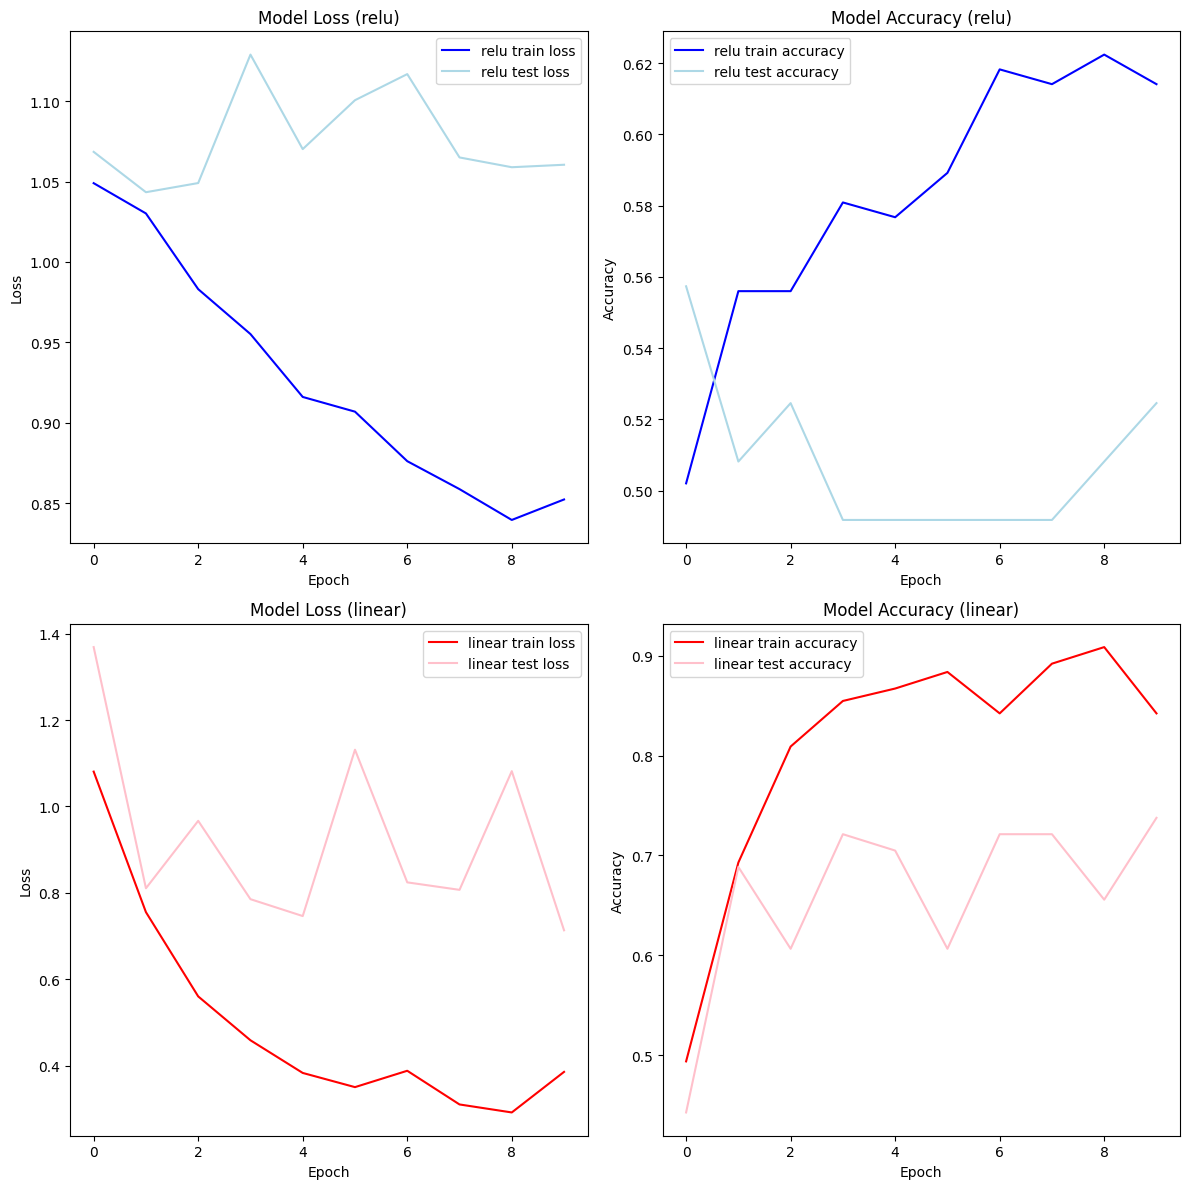

In [33]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [34]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [35]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 10ms/step - loss: 1.0604 - accuracy: 0.5246
Model relu - Test Accuracy: 0.5245901346206665
2/2 [==============================] - 0s 7ms/step - loss: 0.7132 - accuracy: 0.7377
Model linear - Test Accuracy: 0.7377049326896667


In [36]:
accuracy_l['n100_b10'] = accuracy_linear
accuracy_r['n100_b10'] = accuracy_relu

## 5000 нейронов 10 batch_size

In [37]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [38]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5000)              2005000   
                                                                 
 dense_17 (Dense)            (None, 15)                75015     
                                                                 
 dense_18 (Dense)            (None, 5)                 80        
                                                                 
 dense_19 (Dense)            (None, 3)                 18        
                                                                 
Total params: 2080113 (7.94 MB)
Trainable params: 2080113 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              

In [39]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
25/25 [==============================] - 2s 44ms/step - loss: 1.3100 - accuracy: 0.3112 - val_loss: 1.0992 - val_accuracy: 0.2951
Epoch 2/10
25/25 [==============================] - 1s 29ms/step - loss: 1.0986 - accuracy: 0.3402 - val_loss: 1.0993 - val_accuracy: 0.2951
Epoch 3/10
25/25 [==============================] - 1s 28ms/step - loss: 1.0987 - accuracy: 0.3402 - val_loss: 1.0995 - val_accuracy: 0.2951
Epoch 4/10
25/25 [==============================] - 1s 30ms/step - loss: 1.0986 - accuracy: 0.3402 - val_loss: 1.0995 - val_accuracy: 0.2951
Epoch 5/10
25/25 [==============================] - 1s 30ms/step - loss: 1.0986 - accuracy: 0.3402 - val_loss: 1.0995 - val_accuracy: 0.2951
Epoch 6/10
25/25 [==============================] - 1s 29ms/step - loss: 1.0987 - accuracy: 0.3402 - val_loss: 1.0995 - val_accuracy: 0.2951
Epoch 7/10
25/25 [==============================] - 1s 27ms/step - loss: 1.0988 - accuracy: 0.3402 - val_loss: 1.0994 - val_accuracy: 0.2951
Epoch 8/10
25

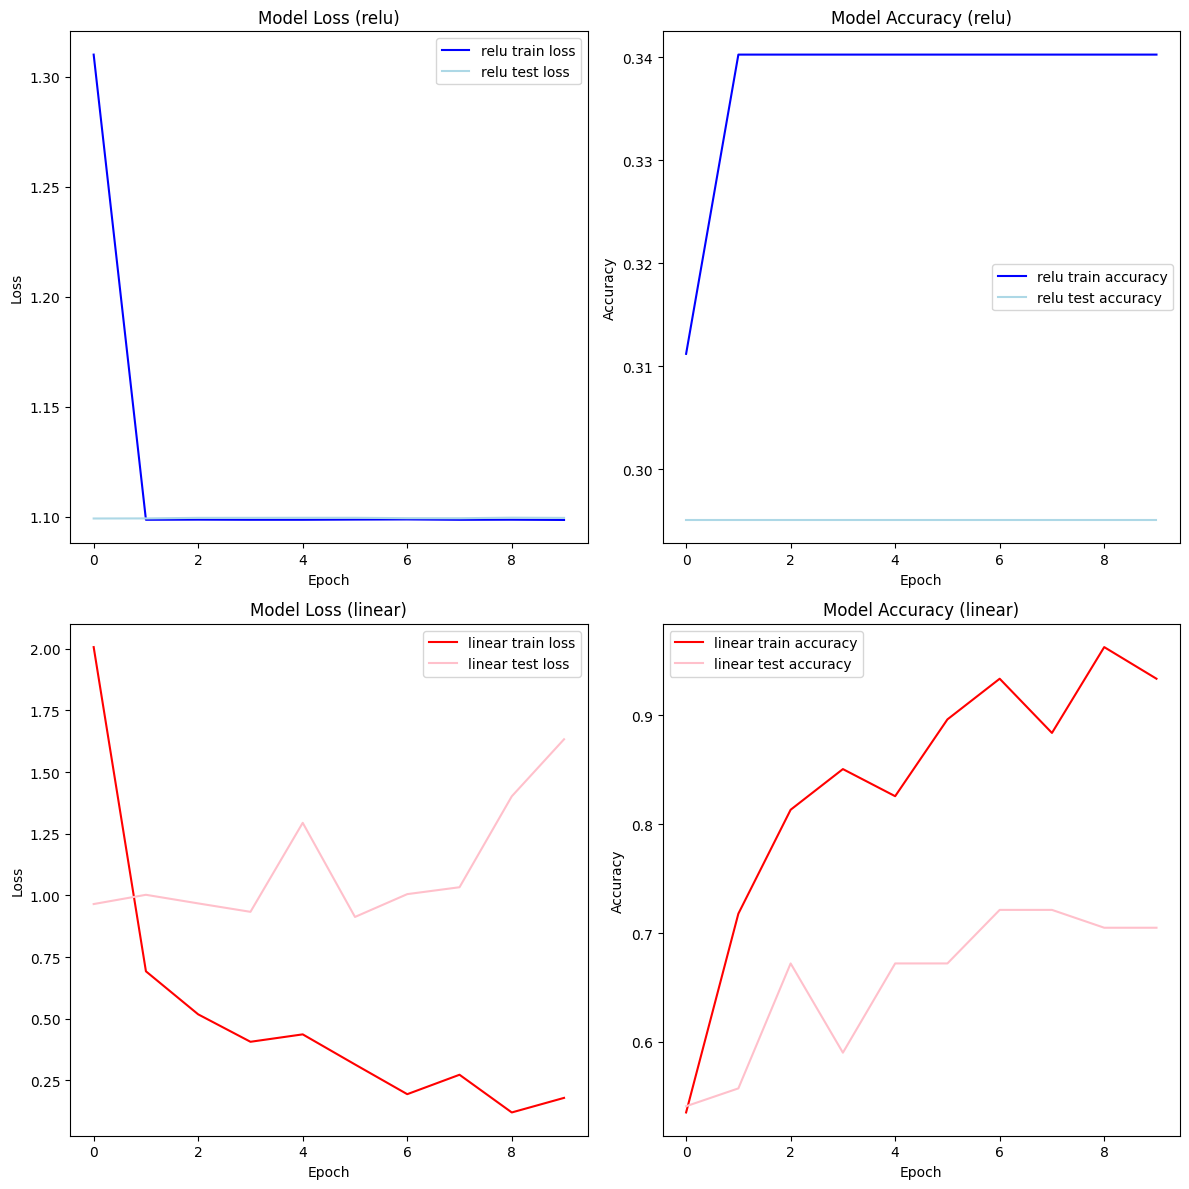

In [40]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [41]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [42]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 11ms/step - loss: 1.0995 - accuracy: 0.2951
Model relu - Test Accuracy: 0.2950819730758667
2/2 [==============================] - 0s 11ms/step - loss: 1.6332 - accuracy: 0.7049
Model linear - Test Accuracy: 0.7049180269241333


In [43]:
accuracy_l['n5000_b10'] = accuracy_linear
accuracy_r['n5000_b10'] = accuracy_relu

## 10 нейронов 100 batch_size

In [44]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(10, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(10, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [45]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                6015      
                                                                 
 dense_25 (Dense)            (None, 10)                160       
                                                                 
 dense_26 (Dense)            (None, 5)                 55        
                                                                 
 dense_27 (Dense)            (None, 3)                 18        
                                                                 
Total params: 6248 (24.41 KB)
Trainable params: 6248 (24.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Para

In [46]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
3/3 [==============================] - 1s 108ms/step - loss: 1.1542 - accuracy: 0.3361 - val_loss: 1.1012 - val_accuracy: 0.3279
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 1.0815 - accuracy: 0.4066 - val_loss: 1.0857 - val_accuracy: 0.3934
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0617 - accuracy: 0.4398 - val_loss: 1.0653 - val_accuracy: 0.4918
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 1.0405 - accuracy: 0.4564 - val_loss: 1.0508 - val_accuracy: 0.5082
Epoch 5/10
3/3 [==============================] - 0s 25ms/step - loss: 1.0208 - accuracy: 0.4730 - val_loss: 1.0469 - val_accuracy: 0.5082
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 1.0017 - accuracy: 0.4896 - val_loss: 1.0393 - val_accuracy: 0.5410
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.9802 - accuracy: 0.5062 - val_loss: 1.0278 - val_accuracy: 0.5246
Epoch 8/10
3/3 [==========

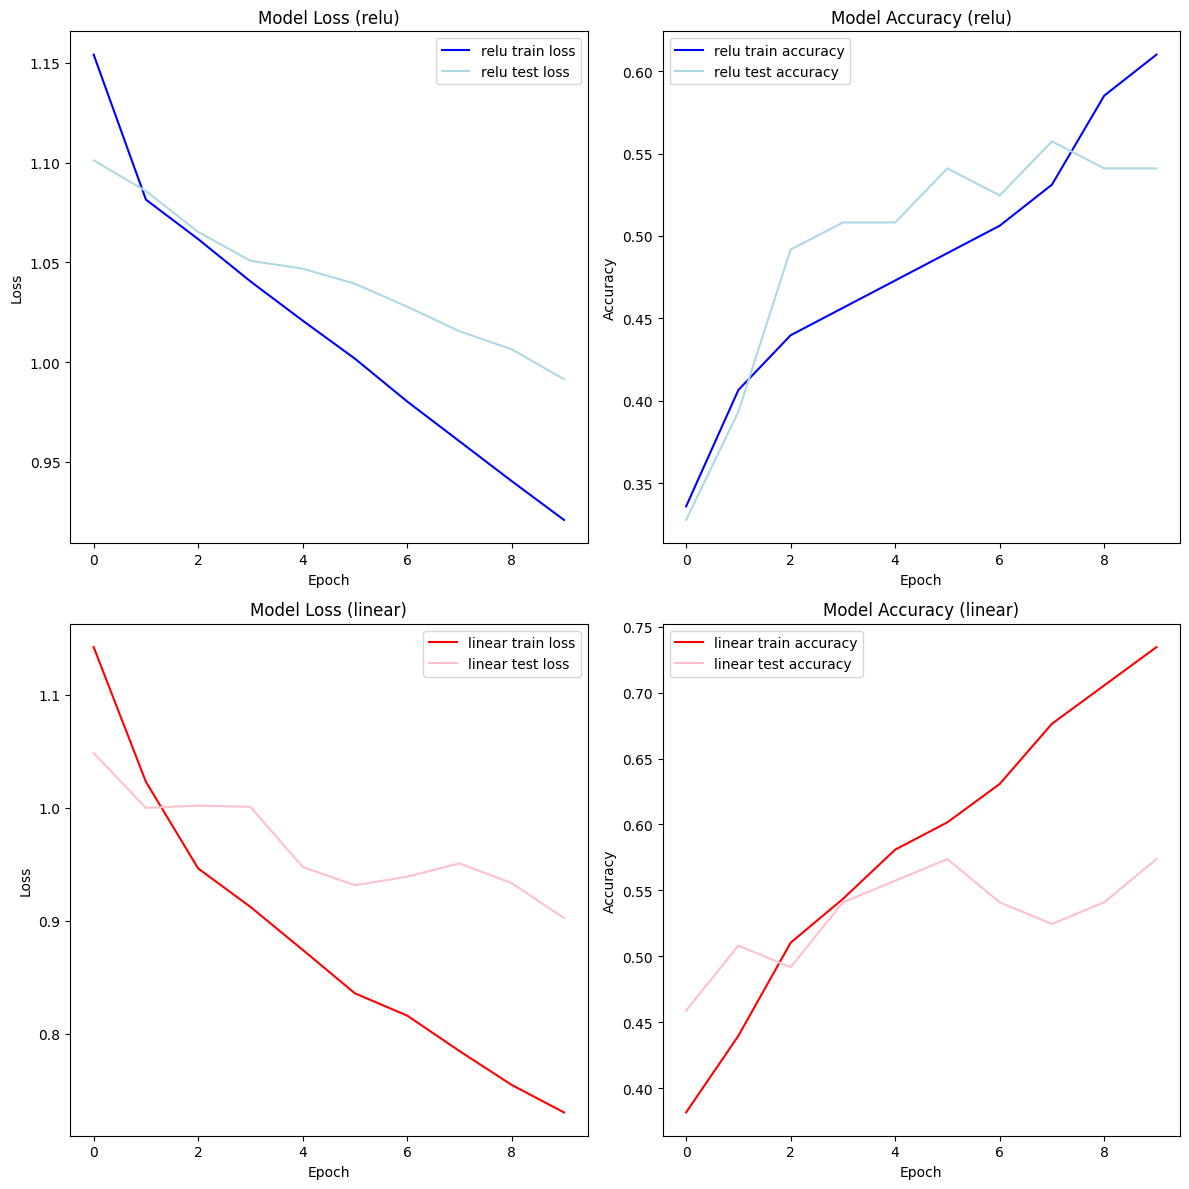

In [47]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [48]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [49]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 7ms/step - loss: 0.9914 - accuracy: 0.5410
Model relu - Test Accuracy: 0.5409836173057556
2/2 [==============================] - 0s 7ms/step - loss: 0.9025 - accuracy: 0.5738
Model linear - Test Accuracy: 0.5737704634666443


In [50]:
accuracy_l['n10_b100'] = accuracy_linear
accuracy_r['n10_b100'] = accuracy_relu

## 100 нейронови100 batch_size

In [51]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [52]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               40100     
                                                                 
 dense_33 (Dense)            (None, 15)                1515      
                                                                 
 dense_34 (Dense)            (None, 5)                 80        
                                                                 
 dense_35 (Dense)            (None, 3)                 18        
                                                                 
Total params: 41713 (162.94 KB)
Trainable params: 41713 (162.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              

In [53]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
3/3 [==============================] - 1s 110ms/step - loss: 1.0967 - accuracy: 0.3361 - val_loss: 1.0932 - val_accuracy: 0.3770
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 1.0389 - accuracy: 0.3734 - val_loss: 1.0627 - val_accuracy: 0.3934
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 1.0009 - accuracy: 0.4398 - val_loss: 1.0677 - val_accuracy: 0.4426
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.9602 - accuracy: 0.5062 - val_loss: 1.0435 - val_accuracy: 0.5246
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 0.9333 - accuracy: 0.5436 - val_loss: 1.0525 - val_accuracy: 0.5082
Epoch 6/10
3/3 [==============================] - 0s 19ms/step - loss: 0.9089 - accuracy: 0.5353 - val_loss: 1.0270 - val_accuracy: 0.5410
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 0.8756 - accuracy: 0.5311 - val_loss: 1.0032 - val_accuracy: 0.5246
Epoch 8/10
3/3 [==========

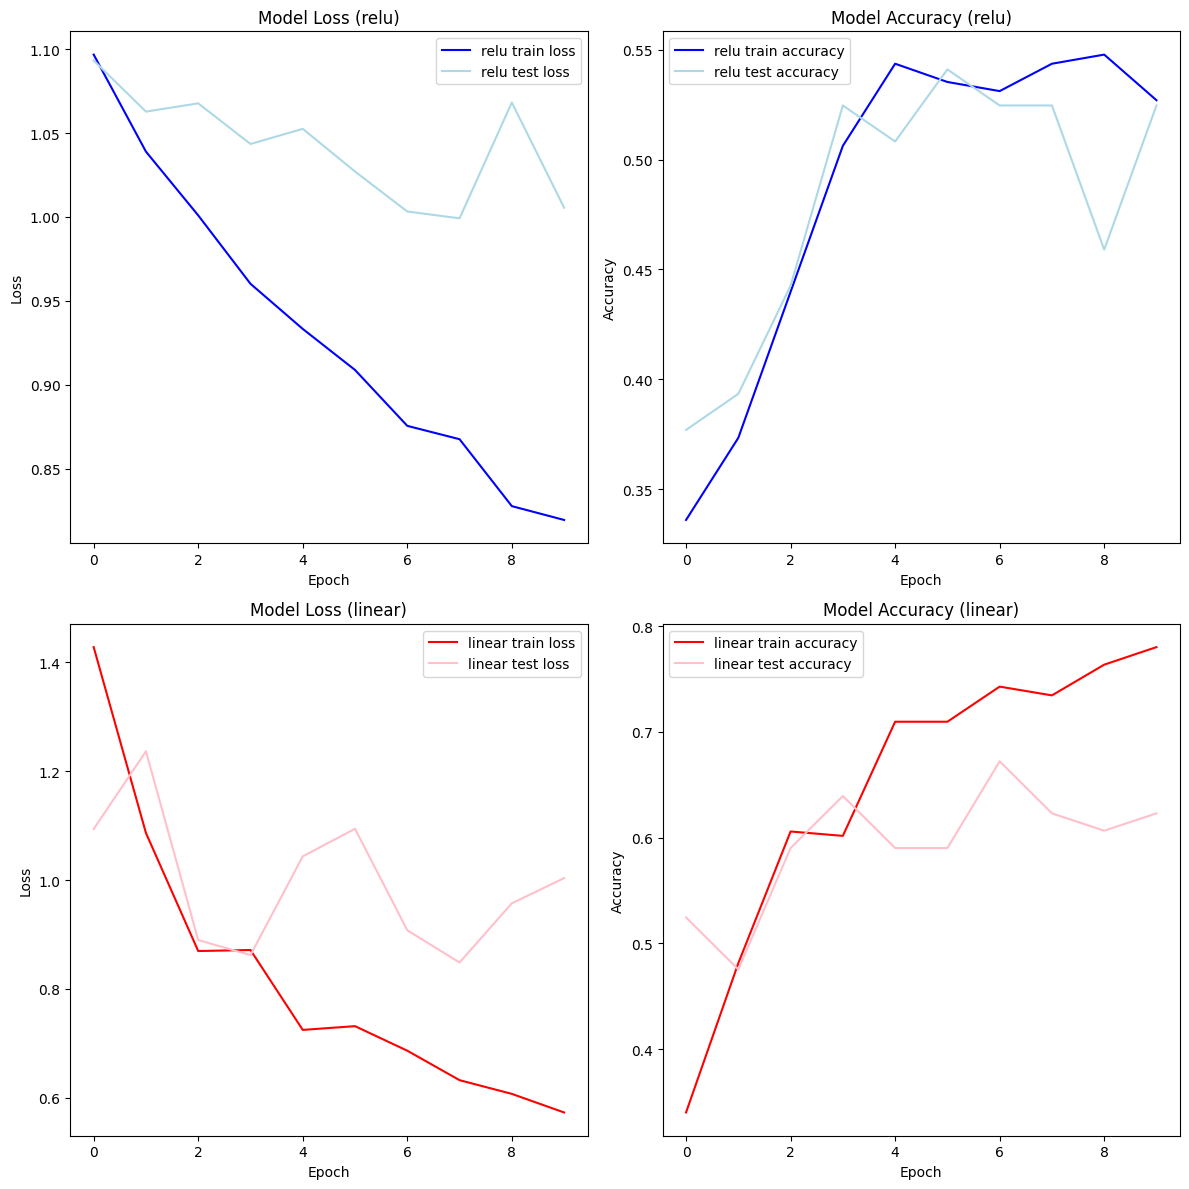

In [54]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [55]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [56]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 6ms/step - loss: 1.0055 - accuracy: 0.5246
Model relu - Test Accuracy: 0.5245901346206665
2/2 [==============================] - 0s 7ms/step - loss: 1.0038 - accuracy: 0.6230
Model linear - Test Accuracy: 0.6229507923126221


In [57]:
accuracy_l['n100_b100'] = accuracy_linear
accuracy_r['n100_b100'] = accuracy_relu

## 5000 нейронов 100 batch_size

In [58]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [59]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 5000)              2005000   
                                                                 
 dense_41 (Dense)            (None, 15)                75015     
                                                                 
 dense_42 (Dense)            (None, 5)                 80        
                                                                 
 dense_43 (Dense)            (None, 3)                 18        
                                                                 
Total params: 2080113 (7.94 MB)
Trainable params: 2080113 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape            

In [60]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
3/3 [==============================] - 1s 145ms/step - loss: 1.5776 - accuracy: 0.3402 - val_loss: 1.0653 - val_accuracy: 0.4754
Epoch 2/10
3/3 [==============================] - 0s 58ms/step - loss: 0.9120 - accuracy: 0.5892 - val_loss: 1.0168 - val_accuracy: 0.5246
Epoch 3/10
3/3 [==============================] - 0s 50ms/step - loss: 0.8074 - accuracy: 0.7137 - val_loss: 0.9657 - val_accuracy: 0.5902
Epoch 4/10
3/3 [==============================] - 0s 54ms/step - loss: 0.7008 - accuracy: 0.7510 - val_loss: 0.9083 - val_accuracy: 0.6066
Epoch 5/10
3/3 [==============================] - 0s 54ms/step - loss: 0.6842 - accuracy: 0.7137 - val_loss: 1.1311 - val_accuracy: 0.6066
Epoch 6/10
3/3 [==============================] - 0s 56ms/step - loss: 0.6203 - accuracy: 0.7925 - val_loss: 0.9182 - val_accuracy: 0.6230
Epoch 7/10
3/3 [==============================] - 0s 52ms/step - loss: 0.6298 - accuracy: 0.7469 - val_loss: 1.2549 - val_accuracy: 0.5574
Epoch 8/10
3/3 [==========

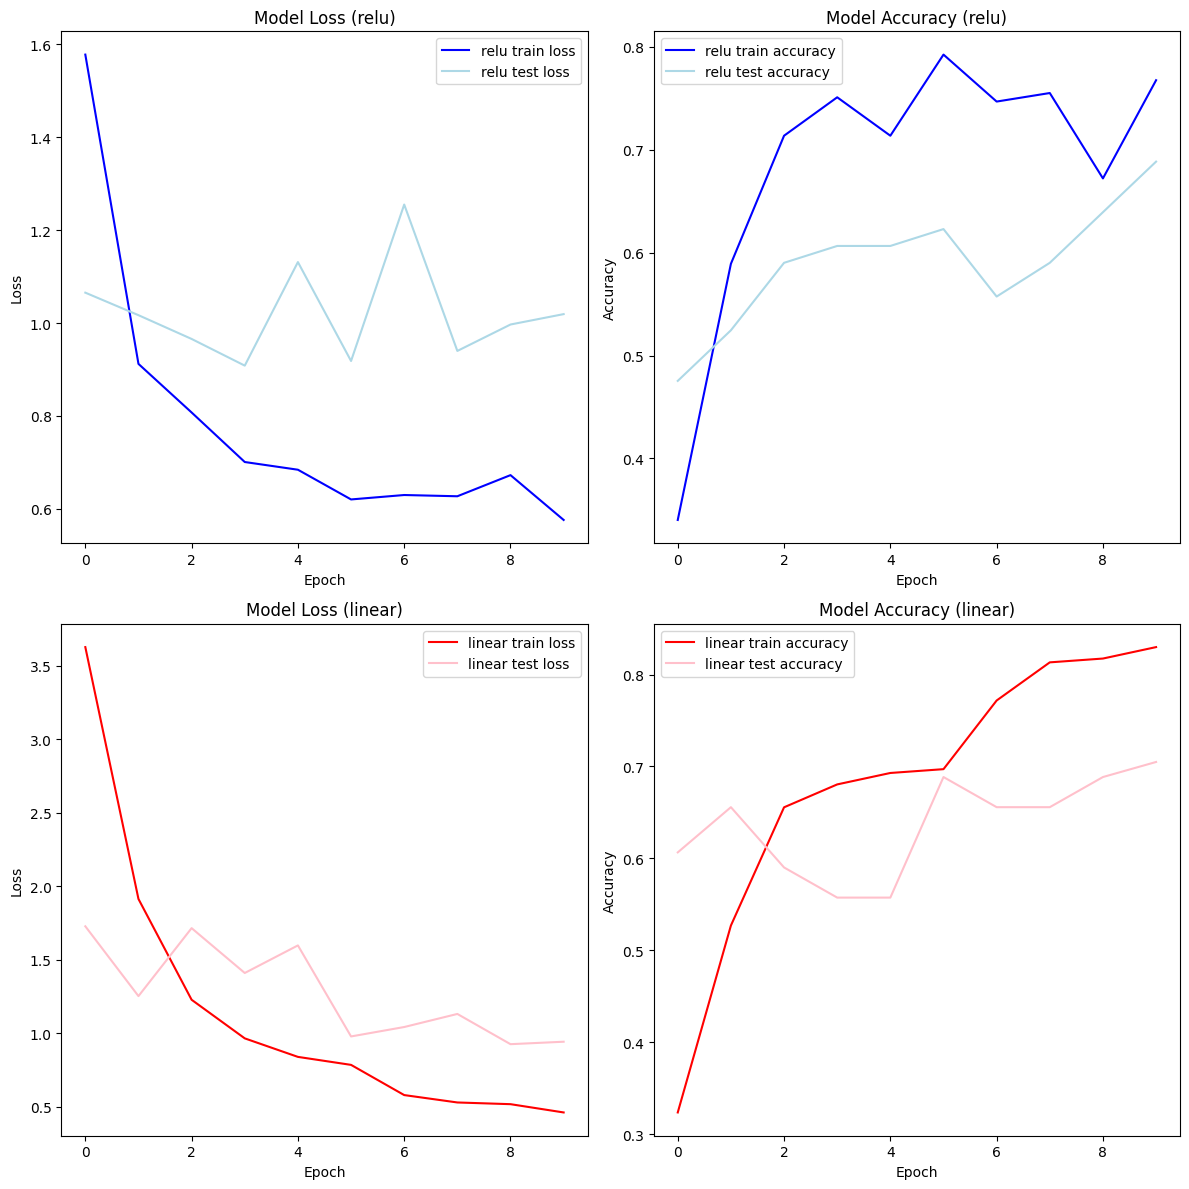

In [61]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [62]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [63]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 19ms/step - loss: 1.0191 - accuracy: 0.6885
Model relu - Test Accuracy: 0.688524603843689
2/2 [==============================] - 0s 31ms/step - loss: 0.9428 - accuracy: 0.7049
Model linear - Test Accuracy: 0.7049180269241333


In [64]:
accuracy_l['n5000_b100'] = accuracy_linear
accuracy_r['n5000_b100'] = accuracy_relu

## 10 нейронов 1000 batch_size

In [65]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(10, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(15, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(10, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [66]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 15)                6015      
                                                                 
 dense_49 (Dense)            (None, 10)                160       
                                                                 
 dense_50 (Dense)            (None, 5)                 55        
                                                                 
 dense_51 (Dense)            (None, 3)                 18        
                                                                 
Total params: 6248 (24.41 KB)
Trainable params: 6248 (24.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Pa

In [67]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.1096 - accuracy: 0.3568 - val_loss: 1.0939 - val_accuracy: 0.4590
Epoch 2/10
1/1 [==============================] - 0s 70ms/step - loss: 1.0401 - accuracy: 0.4315 - val_loss: 1.0825 - val_accuracy: 0.3934
Epoch 3/10
1/1 [==============================] - 0s 76ms/step - loss: 1.0323 - accuracy: 0.4398 - val_loss: 1.0802 - val_accuracy: 0.4426
Epoch 4/10
1/1 [==============================] - 0s 98ms/step - loss: 1.0183 - accuracy: 0.4564 - val_loss: 1.0733 - val_accuracy: 0.4262
Epoch 5/10
1/1 [==============================] - 0s 144ms/step - loss: 1.0022 - accuracy: 0.5021 - val_loss: 1.0666 - val_accuracy: 0.4426
Epoch 6/10
1/1 [==============================] - 0s 71ms/step - loss: 0.9835 - accuracy: 0.5726 - val_loss: 1.0629 - val_accuracy: 0.4426
Epoch 7/10
1/1 [==============================] - 0s 74ms/step - loss: 0.9635 - accuracy: 0.6390 - val_loss: 1.0690 - val_accuracy: 0.4426
Epoch 8/10
1/1 [============

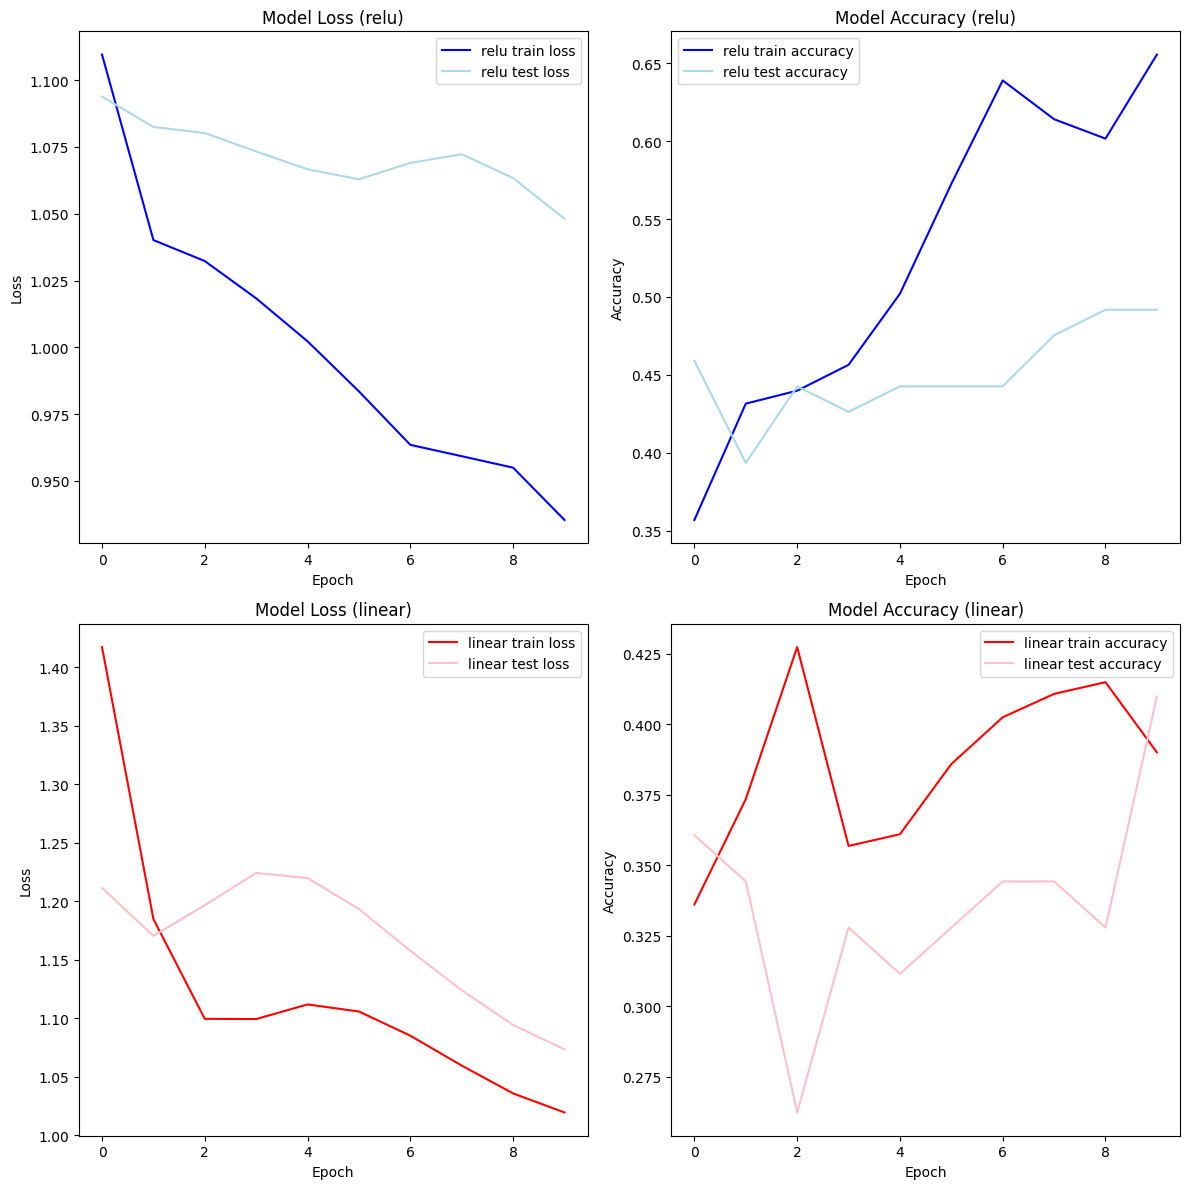

In [68]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [69]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [70]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 13ms/step - loss: 1.0481 - accuracy: 0.4918
Model relu - Test Accuracy: 0.49180328845977783
2/2 [==============================] - 0s 14ms/step - loss: 1.0733 - accuracy: 0.4098
Model linear - Test Accuracy: 0.4098360538482666


In [71]:
accuracy_l['n10_b1000'] = accuracy_linear
accuracy_r['n10_b1000'] = accuracy_relu

## 100 нейронов 1000 batch_size

In [72]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(100, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [73]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 100)               40100     
                                                                 
 dense_57 (Dense)            (None, 15)                1515      
                                                                 
 dense_58 (Dense)            (None, 5)                 80        
                                                                 
 dense_59 (Dense)            (None, 3)                 18        
                                                                 
Total params: 41713 (162.94 KB)
Trainable params: 41713 (162.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape            

In [74]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.2010 - accuracy: 0.3361 - val_loss: 1.3698 - val_accuracy: 0.3443
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 1.3188 - accuracy: 0.3361 - val_loss: 1.1577 - val_accuracy: 0.3443
Epoch 3/10
1/1 [==============================] - 0s 38ms/step - loss: 1.1501 - accuracy: 0.3361 - val_loss: 1.1096 - val_accuracy: 0.3607
Epoch 4/10
1/1 [==============================] - 0s 62ms/step - loss: 1.1136 - accuracy: 0.3361 - val_loss: 1.0934 - val_accuracy: 0.3443
Epoch 5/10
1/1 [==============================] - 0s 57ms/step - loss: 1.0988 - accuracy: 0.3527 - val_loss: 1.0881 - val_accuracy: 0.3607
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 1.0914 - accuracy: 0.3361 - val_loss: 1.0847 - val_accuracy: 0.3607
Epoch 7/10
1/1 [==============================] - 0s 59ms/step - loss: 1.0865 - accuracy: 0.3402 - val_loss: 1.0825 - val_accuracy: 0.3443
Epoch 8/10
1/1 [=============

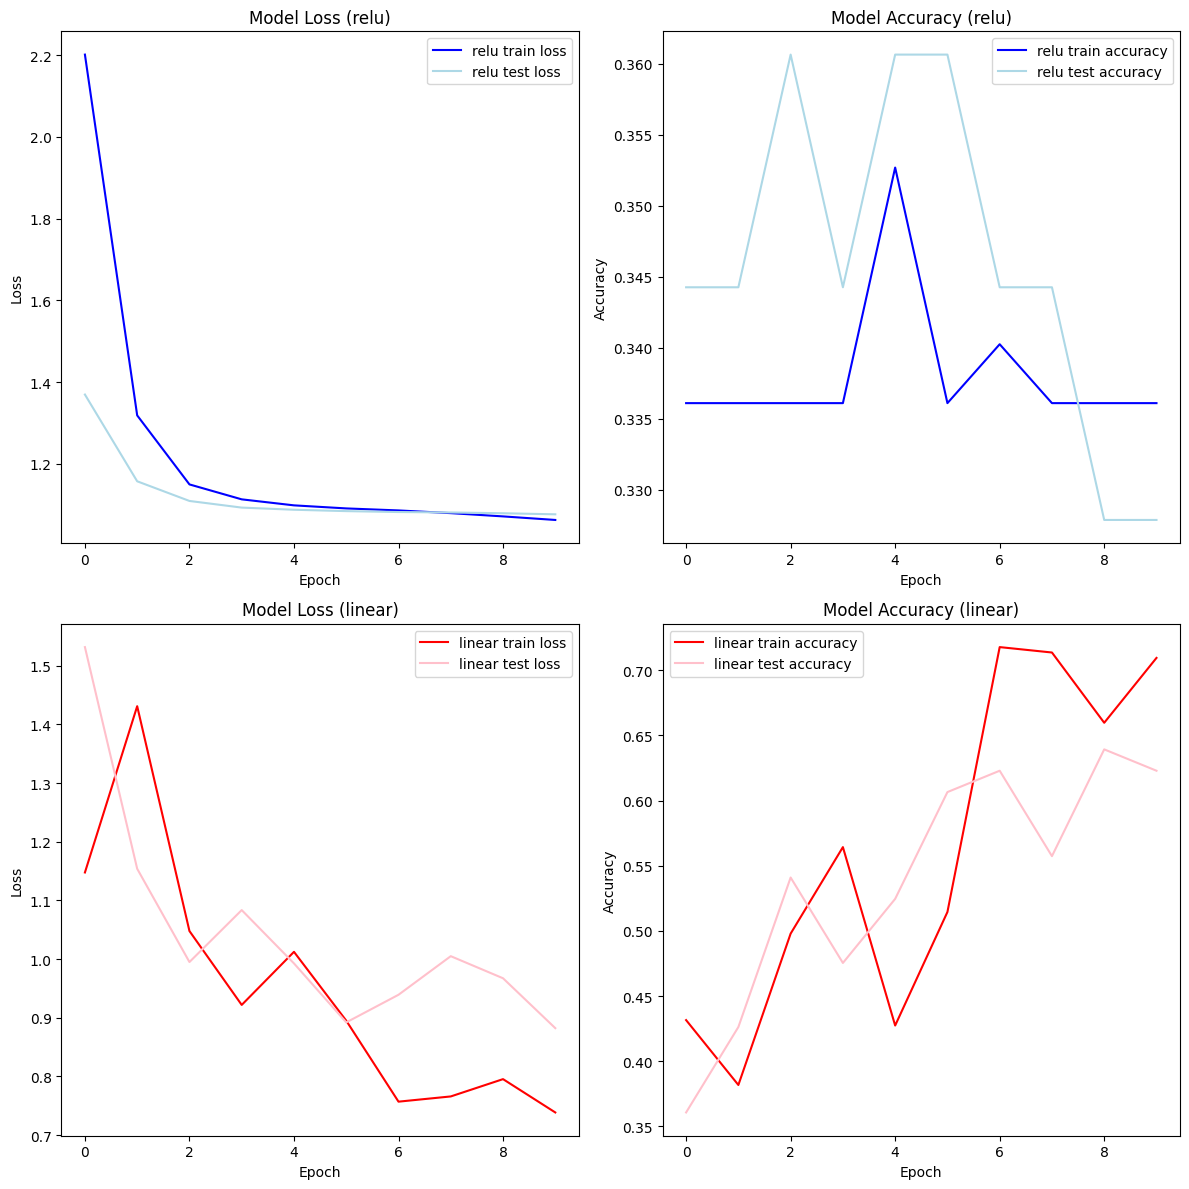

In [75]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [76]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [77]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 8ms/step - loss: 1.0769 - accuracy: 0.3279
Model relu - Test Accuracy: 0.32786884903907776
2/2 [==============================] - 0s 7ms/step - loss: 0.8823 - accuracy: 0.6230
Model linear - Test Accuracy: 0.6229507923126221


In [78]:
accuracy_l['n100_b1000'] = accuracy_linear
accuracy_r['n100_b1000'] = accuracy_relu

## 5000 нейронов 1000 batch_size

In [79]:
# Первая модель с активацией 'relu'
model_relu = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu-активацией
    Dense(15, activation='relu'),  # Второй слой 15 нейронов с relu-активацией
    Dense(5, activation='relu'),  # Третий слой 10 нейронов с relu-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

# Вторая модель с активацией 'linear'
model_linear = Sequential([
    Dense(5000, input_dim=400, activation='relu'),  # Один слой 10 нейронов с relu -активацией
    Dense(15, activation='linear'),  # Второй слой 15 нейронов с linear-активацией
    Dense(5, activation='linear'),  # Третий слой 10 нейронов с linear-активацией
    Dense(3, activation='softmax')  # Последний слой с 3 нейронами и softmax-активацией
])

In [80]:
# Компиляция модели
model_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model_relu.summary())
print(model_linear.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 5000)              2005000   
                                                                 
 dense_65 (Dense)            (None, 15)                75015     
                                                                 
 dense_66 (Dense)            (None, 5)                 80        
                                                                 
 dense_67 (Dense)            (None, 3)                 18        
                                                                 
Total params: 2080113 (7.94 MB)
Trainable params: 2080113 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape            

In [81]:
# Обучение модели relu
history_relu = model_relu.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

# Обучение модели linear
history_linear = model_linear.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.1335 - accuracy: 0.3112 - val_loss: 1.8650 - val_accuracy: 0.3443
Epoch 2/10
1/1 [==============================] - 0s 99ms/step - loss: 2.1126 - accuracy: 0.3361 - val_loss: 1.5112 - val_accuracy: 0.3443
Epoch 3/10
1/1 [==============================] - 0s 151ms/step - loss: 1.4910 - accuracy: 0.3361 - val_loss: 1.3419 - val_accuracy: 0.3443
Epoch 4/10
1/1 [==============================] - 0s 191ms/step - loss: 1.3274 - accuracy: 0.3361 - val_loss: 1.1031 - val_accuracy: 0.3443
Epoch 5/10
1/1 [==============================] - 0s 154ms/step - loss: 1.0996 - accuracy: 0.3361 - val_loss: 1.0972 - val_accuracy: 0.2951
Epoch 6/10
1/1 [==============================] - 0s 140ms/step - loss: 1.0962 - accuracy: 0.3402 - val_loss: 1.0519 - val_accuracy: 0.4262
Epoch 7/10
1/1 [==============================] - 0s 146ms/step - loss: 1.0287 - accuracy: 0.4772 - val_loss: 1.1714 - val_accuracy: 0.3443
Epoch 8/10
1/1 [========

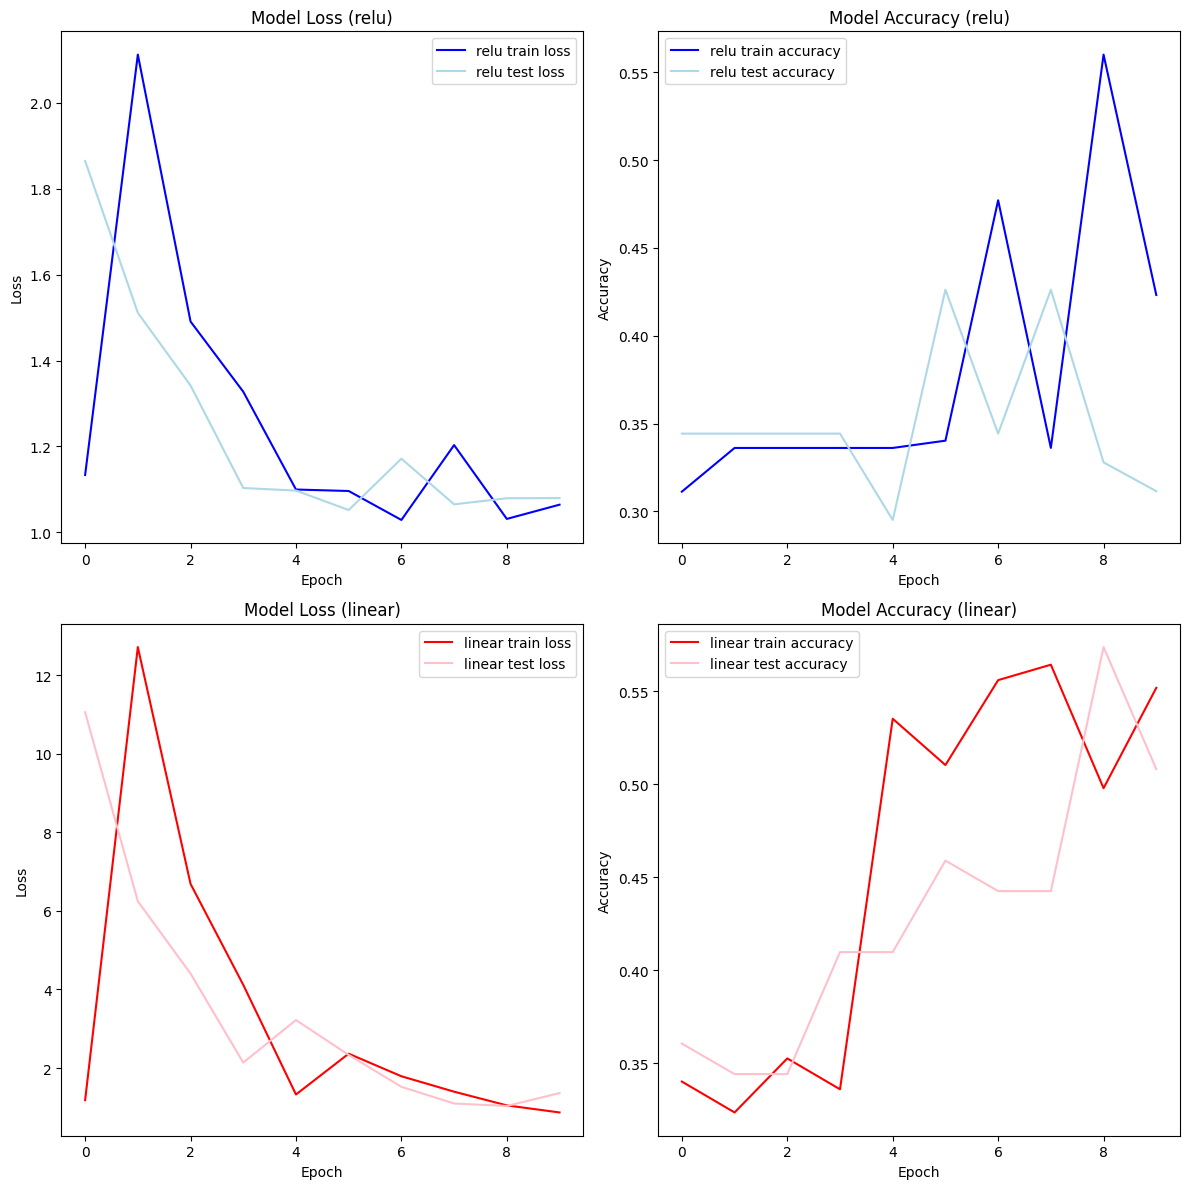

In [82]:
# Графики для функции активации relu
plt.figure(figsize=(12, 12))

# График для loss с функцией активации relu
plt.subplot(2, 2, 1)
plt.plot(history_relu.history['loss'], label='relu train loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='relu test loss', color='lightblue')
plt.title('Model Loss (relu)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации relu
plt.subplot(2, 2, 2)
plt.plot(history_relu.history['accuracy'], label='relu train accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='relu test accuracy', color='lightblue')
plt.title('Model Accuracy (relu)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики для функции активации linear
# График для loss с функцией активации linear
plt.subplot(2, 2, 3)
plt.plot(history_linear.history['loss'], label='linear train loss', color='red')
plt.plot(history_linear.history['val_loss'], label='linear test loss', color='pink')
plt.title('Model Loss (linear)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy с функцией активации linear
plt.subplot(2, 2, 4)
plt.plot(history_linear.history['accuracy'], label='linear train accuracy', color='red')
plt.plot(history_linear.history['val_accuracy'], label='linear test accuracy', color='pink')
plt.title('Model Accuracy (linear)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [83]:
model_relu.save_weights('model.h5')
model_relu.load_weights('model.h5')
model_linear.save_weights('model.h5')
model_linear.load_weights('model.h5')

In [84]:
# Оценка модели с функцией активации relu
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print("Model relu - Test Accuracy:", accuracy_relu)

# Оценка модели с функцией активации linear
loss_linear, accuracy_linear = model_linear.evaluate(x_test, y_test)
print("Model linear - Test Accuracy:", accuracy_linear)


2/2 [==============================] - 0s 14ms/step - loss: 1.0797 - accuracy: 0.3115
Model relu - Test Accuracy: 0.31147539615631104
2/2 [==============================] - 0s 12ms/step - loss: 1.3636 - accuracy: 0.5082
Model linear - Test Accuracy: 0.5081967115402222


In [85]:
accuracy_l['n5000_b1000'] = accuracy_linear
accuracy_r['n5000_b1000'] = accuracy_relu

## таблица

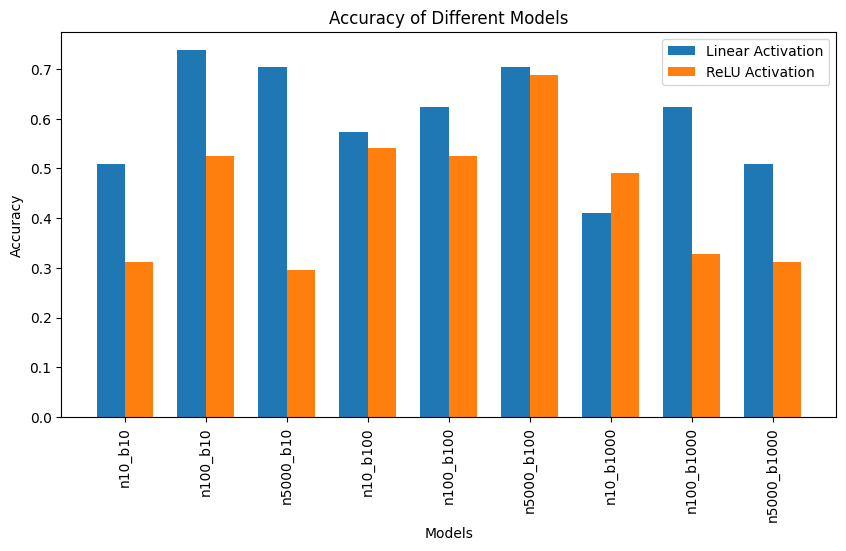

In [105]:
# Получение ключей и значений из словаря accuracy_lin
labels_lin = list(accuracy_l.keys())
values_lin = list(accuracy_l.values())

# Получение ключей и значений из словаря accuracy_re
labels_re = list(accuracy_r.keys())
values_re = list(accuracy_r.values())

# Создание графика
plt.figure(figsize=(10, 5))

# Ширина столбцов
bar_width = 0.35

# Создание массива для оси x для модели с линейной активацией
x_lin = np.arange(len(labels_lin))

# Создание массива для оси x для модели с активацией ReLU с смещением
x_re = np.arange(len(labels_re)) + bar_width

# Построение столбцов для accuracy_lin
plt.bar(x_lin, values_lin, width=bar_width, label='Linear Activation')

# Построение столбцов для accuracy_re с смещением по оси x
plt.bar(x_re, values_re, width=bar_width, label='ReLU Activation')

# Добавление подписей осей и заголовка
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.legend()


# Поворот подписей на 90 градусов
plt.xticks(rotation=90)

# Установка меток на оси x для обеих моделей
plt.xticks(ticks=np.arange(len(labels_lin)) + bar_width / 2, labels=labels_lin)

# Отображение графика
plt.show()